## Getting the latest data from Garmin Connect

- Go to Activities
- Select the running symbol
- Select the Advanced symbol
- Create your new Date Range (14/8/2022 - today)
- Select Filter Activities
- Export csv

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
pwd

'c:\\Users\\robin\\Documents\\GitHub\\running'

In [52]:
df = pd.read_csv("./data/Activities.csv")

df = df[df['Activity Type']=="Running"]
df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True) 
df['Distance'] = df['Distance'].str.replace(',', '.').astype(float)
df['Time'] = pd.to_datetime(df['Time'], infer_datetime_format=True) 
df['Time'] = pd.to_timedelta(df['Time'].dt.time.astype(str)).dt.total_seconds()
df['Time'] = np.round((df['Time']/60),2)
df['Moving Time'] = pd.to_datetime(df['Moving Time'], infer_datetime_format=True) 
df['Moving Time'] = pd.to_timedelta(df['Moving Time'].dt.time.astype(str)).dt.total_seconds()
df['Moving Time'] = np.round((df['Moving Time']/60),2)
df['Elapsed Time'] = pd.to_datetime(df['Elapsed Time'], infer_datetime_format=True) 
df['Elapsed Time'] = pd.to_timedelta(df['Elapsed Time'].dt.time.astype(str)).dt.total_seconds()
df['Elapsed Time'] = np.round((df['Elapsed Time']/60),2)
df['Aerobic TE'] = df['Aerobic TE'].str.replace(',', '.').astype(float)

df['Avg_Pace_minutes'] = df['Avg Pace'].str.rsplit(':').str[0].astype(int)*60 
df['Avg_Pace_seconds'] = df['Avg Pace'].str.rsplit(':').str[-1].astype(int) 
df['avg_pace_in_seconds_per_km'] = df['Avg_Pace_seconds'] + df['Avg_Pace_minutes']
df['avg_pace_in_min_per_km'] = np.round((df['avg_pace_in_seconds_per_km']/60),2)
df['avg_pace_in_kmph'] = np.round((60/df['avg_pace_in_min_per_km']),2)


df['Best_Pace_minutes'] = df['Best Pace'].str.rsplit(':').str[0].astype(int)*60
df['Best_Pace_seconds'] = df['Best Pace'].str.rsplit(':').str[-1].astype(int) 
df['best_pace_seconds_per_km'] = df['Best_Pace_seconds'] + df['Best_Pace_minutes']
df['best_pace_in_min_per_km'] = np.round((df['best_pace_seconds_per_km']/60),2)
df['best_pace_in_kmph'] = np.round((60/df['best_pace_in_min_per_km']),2)

df['Avg GCT Balance'] = df['Avg GCT Balance'].str.replace('--','')
df['Avg GCT Balance'] = df['Avg GCT Balance'].apply(lambda x: x.strip()).replace('', np.nan)
df['GCT_left'] = df['Avg GCT Balance'].astype(str).str[0:4]
df['GCT_right'] = df['Avg GCT Balance'].astype(str).str[10:14]
df['GCT_right'] = df['GCT_right'].apply(lambda x: x.strip()).replace('', np.nan)
df['GCT_left'] = df['GCT_left'].str.replace(',', '.').astype(float)
df['GCT_right'] = df['GCT_right'].str.replace(',', '.').astype(float)
df = df.drop('Avg GCT Balance',axis=1)

convert_to_numeric = ['Total Ascent','Total Descent']
convert_to_numeric_w_comma = ['Avg Stride Length','Avg Vertical Ratio','Avg Vertical Oscillation']

for cl in convert_to_numeric:
  df[str(cl)] = pd.to_numeric(df[str(cl)], errors='coerce')

for cl in convert_to_numeric_w_comma:
  df[str(cl)] = df[str(cl)].str.replace(',', '.').astype(float)

df = df.sort_values(by='Date',ascending=True)
df['Distance_cumsum'] = df['Distance'].cumsum()

df = df.reset_index(drop=True)

df = df.fillna(0)

df = df[['Date', 'Distance', 'Distance_cumsum', 'Calories',
       'Time', 'Avg HR', 'Max HR', 'Aerobic TE', 'Avg Run Cadence',
       'Max Run Cadence', 'Avg Stride Length', 'Avg Vertical Ratio',
       'Avg Vertical Oscillation', 'Avg Ground Contact Time',
       'Moving Time', 'Elapsed Time', 'avg_pace_in_min_per_km','avg_pace_in_kmph',
       'best_pace_in_min_per_km', 'best_pace_in_kmph','GCT_left', 'GCT_right',]]

df.head(8)
#df.tail()

,Date,Distance,Distance_cumsum,Calories,Time,Avg HR,Max HR,Aerobic TE,Avg Run Cadence,Max Run Cadence,Avg Stride Length,Avg Vertical Ratio,Avg Vertical Oscillation,Avg Ground Contact Time,Moving Time,Elapsed Time,avg_pace_in_min_per_km,avg_pace_in_kmph,best_pace_in_min_per_km,best_pace_in_kmph,GCT_left,GCT_right
0,2022-08-15 10:39:36,3.13,3.13,250,18.02,171,188,3.4,151,170,1.14,0.0,0.0,0,17.72,18.02,5.77,10.40,4.65,12.90,0.0,0.0
1,2022-08-18 14:00:06,3.62,6.75,284,21.02,166,182,3.3,152,166,1.14,0.0,0.0,0,21.00,21.02,5.80,10.34,4.92,12.20,0.0,0.0
2,2022-08-22 17:24:41,4.14,10.89,321,24.02,164,181,3.4,152,216,1.13,0.0,0.0,0,24.00,24.02,5.80,10.34,4.93,12.17,0.0,0.0
3,2022-08-28 16:41:38,3.63,14.52,279,24.20,146,161,2.7,148,162,1.01,0.0,0.0,0,24.12,24.20,6.67,9.00,5.35,11.21,0.0,0.0
4,2022-08-31 17:22:02,4.39,18.91,342,27.13,157,176,3.2,158,230,1.02,0.0,0.0,0,27.08,27.13,6.18,9.71,4.92,12.20,0.0,0.0
5,2022-09-04 10:37:28,4.68,23.59,375,30.18,148,176,3.2,156,174,0.99,0.0,0.0,0,0.00,30.18,6.45,9.30,4.78,12.55,0.0,0.0
6,2022-09-08 10:01:16,3.69,27.28,283,21.02,160,182,3.2,165,174,1.06,9.5,10.2,263,0.00,21.02,5.68,10.56,4.68,12.82,52.0,48.0
7,2022-09-11 16:21:55,3.76,31.04,299,25.52,146,179,3.0,148,182,0.96,8.2,8.0,298,25.50,25.52,6.78,8.85,3.70,16.22,51.2,48.8


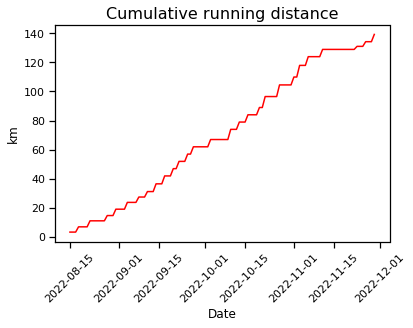

In [51]:
sns.set_context("notebook")

period = df.copy()
period.index=df.Date
del period['Date']
period = pd.DataFrame(period.groupby(pd.Grouper(freq='D'))['Distance'].sum())
period['Distance_cumsum'] = period['Distance'].cumsum()
period = period.reset_index()

"""fig = px.line(period, x="Date", y="Distance_cumsum")
fig.show(renderer="colab")"""

plt.figure()#figsize=(5,5)
line=sns.lineplot(x=period.Date, y=period.Distance_cumsum, color="r") #marker='o'
plt.xticks(rotation=45)
#plt.yticks(size=5, horizontalalignment='right',fontweight='light',fontsize='large')

plt.xlabel('Date',size=12)
plt.ylabel('km',size=12)
plt.title('Cumulative running distance',size=16)
plt.savefig('./images/cumulative_distance')
plt.show()

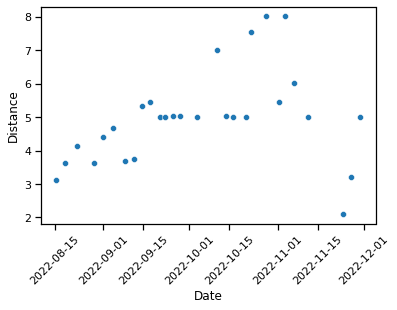

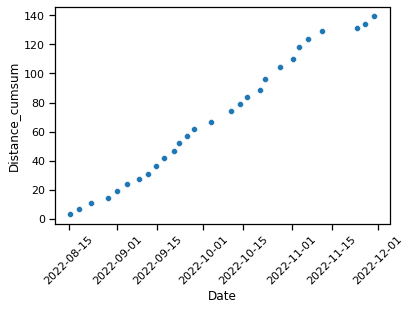

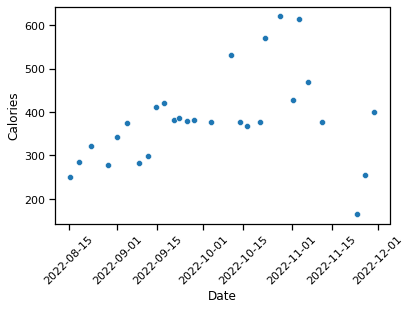

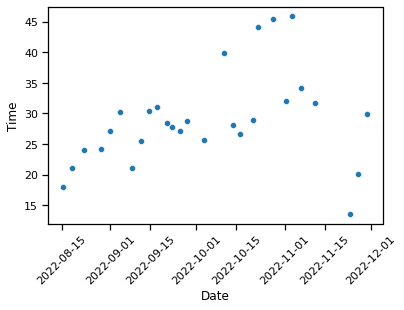

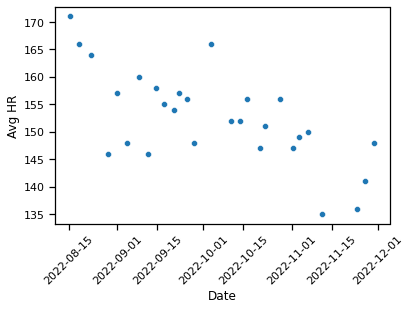

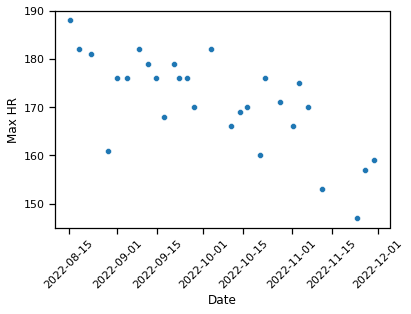

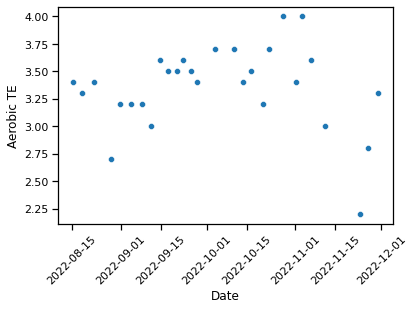

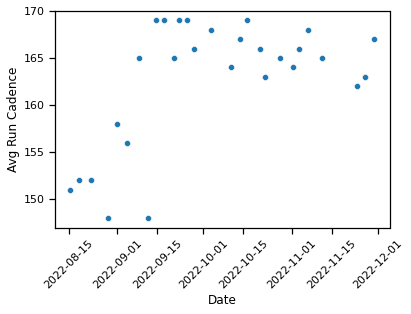

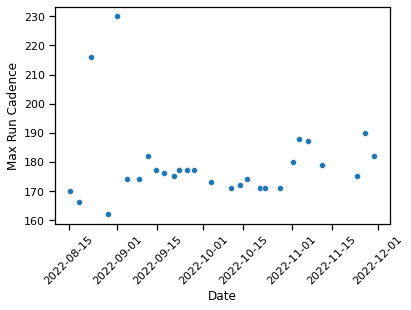

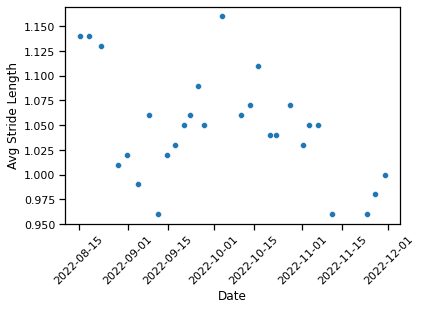

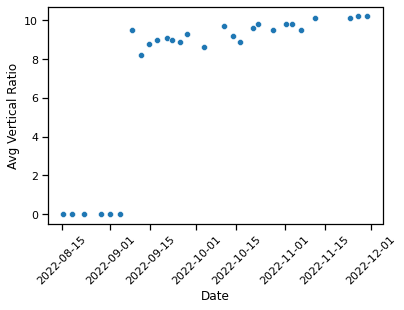

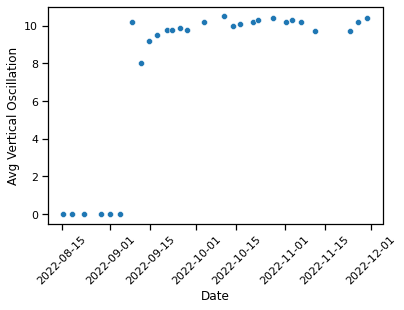

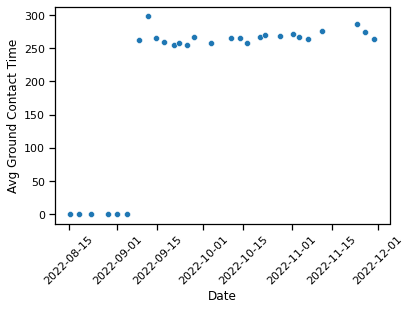

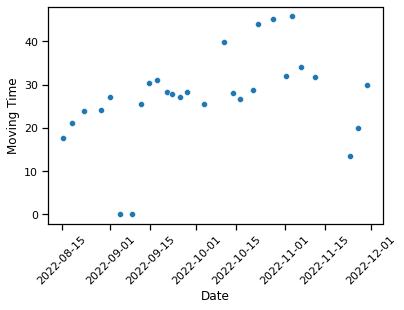

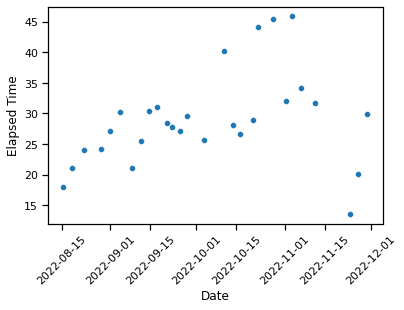

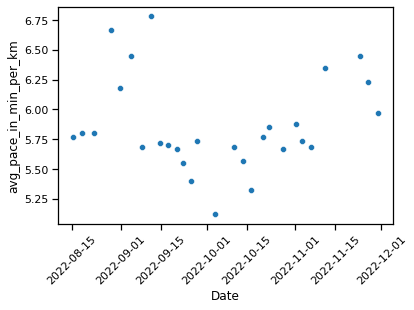

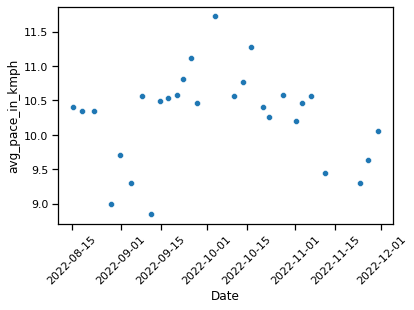

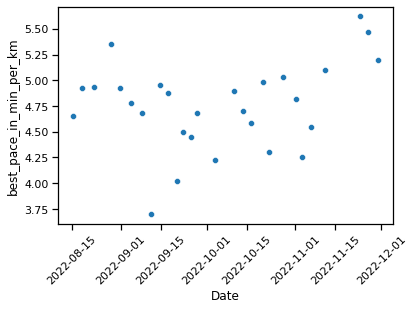

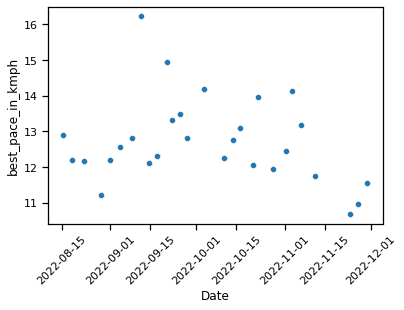

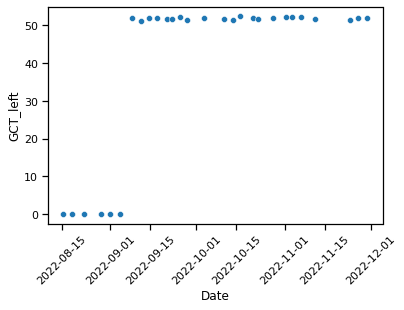

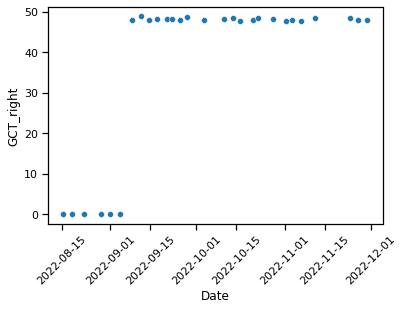

In [9]:
for cl in df.columns.to_list():
  if cl not in ['Date']:
    plt.figure()
    line=sns.scatterplot(data=df, x="Date", y=str(cl)) 
    plt.xticks(rotation=45)    
    plt.xlabel('Date',size=12)
    plt.show()
  else:
    continue

In [10]:
df_5k = df[(df['Distance']>4.9) & (df['Distance']<5.5)]
df_5k = df_5k.drop(['Time', 'Aerobic TE','avg_pace_in_kmph', 'best_pace_in_kmph', 'best_pace_in_min_per_km', 'Moving Time','Max Run Cadence','Calories'],axis=1)
df_5k = df_5k[['Date', 'Distance','Elapsed Time', 'Avg HR', 'Max HR', 'Avg Run Cadence',
       'Avg Stride Length', 'Avg Vertical Ratio', 'Avg Vertical Oscillation',
       'Avg Ground Contact Time', 'avg_pace_in_min_per_km',
       'GCT_left', 'GCT_right']]
df_5k.sort_values(by='Date')

,Date,Distance,Elapsed Time,Avg HR,Max HR,Avg Run Cadence,Avg Stride Length,Avg Vertical Ratio,Avg Vertical Oscillation,Avg Ground Contact Time,avg_pace_in_min_per_km,GCT_left,GCT_right
8,2022-09-14 16:02:35,5.33,30.43,158,176,169,1.02,8.8,9.2,265,5.72,52.0,48.0
9,2022-09-17 09:51:25,5.45,31.08,155,168,169,1.03,9.0,9.5,259,5.70,51.9,48.1
10,2022-09-20 18:35:45,5.01,28.38,154,179,165,1.05,9.1,9.8,255,5.67,51.8,48.2
11,2022-09-22 16:11:31,5.01,27.82,157,176,169,1.06,9.0,9.8,258,5.55,51.8,48.2
12,2022-09-25 10:39:39,5.02,27.08,156,176,169,1.09,8.9,9.9,255,5.40,52.2,47.8
13,2022-09-27 18:00:53,5.02,29.53,148,170,166,1.05,9.3,9.8,267,5.73,51.4,48.6
14,2022-10-03 18:56:55,5.01,25.65,166,182,168,1.16,8.6,10.2,258,5.12,52.1,47.9
16,2022-10-13 17:33:47,5.03,28.03,152,169,167,1.07,9.2,10.0,265,5.57,51.5,48.5
17,2022-10-16 10:05:19,5.01,26.63,156,170,169,1.11,8.9,10.1,258,5.32,52.4,47.6
18,2022-10-20 18:06:23,5.01,28.87,147,160,166,1.04,9.6,10.2,267,5.77,52.0,48.0


In [ ]:
plt.figure()#figsize=(5,5)
line=sns.lineplot(x=period.Date, y=period.Distance_cumsum, color="r") #marker='o'
plt.xticks(rotation=45)
#plt.yticks(size=5, horizontalalignment='right',fontweight='light',fontsize='large')

plt.xlabel('Date',size=12)
plt.ylabel('km',size=12)
plt.title('Cumulative running distance',size=16)
plt.show()

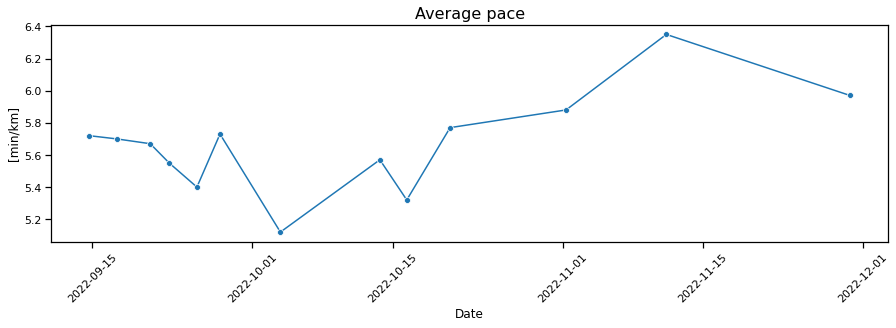

In [49]:
plt.figure(figsize=(15,4))
line = sns.lineplot(x=df_5k.Date, y=df_5k.avg_pace_in_min_per_km,marker='o')
plt.xlabel('Date',size=12)
plt.xticks(rotation=45)
plt.ylabel('[min/km]',size=12)
plt.title('Average pace',size=16)
plt.savefig('./images/avg_pace')

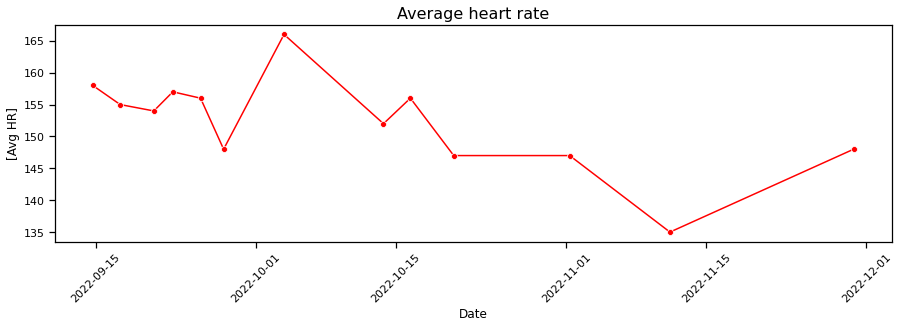

In [53]:
plt.figure(figsize=(15,4))
line = sns.lineplot(x=df_5k.Date, y=df_5k['Avg HR'],color='r',marker='o')
plt.xlabel('Date',size=12)
plt.xticks(rotation=45)
plt.ylabel('[Avg HR]',size=12)
plt.title('Average heart rate',size=16)
plt.savefig('./images/avg_hr')